# Unsupervised Learning Techniques for weather data

## K-Means

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp


In [48]:
from sklearn.cluster import KMeans

In [49]:
df_X = pd.read_csv('weather_data.csv', usecols=range(7)).copy()
df_X.tail()

,Temperature(°C),Dew Point(°F),Humidity(°%),Wind Speed(°mph),Wind Gust(°mph),Pressure(°in),Precip.
48166,9,4,71,13,0,31,0.0
48167,9,4,71,12,0,31,0.0
48168,9,4,71,10,0,31,0.0
48169,9,4,71,12,0,31,0.0
48170,9,4,71,13,0,31,0.0


### Determination of optimum number of clusters

In [50]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,20))

Avoid warnings:

In [51]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

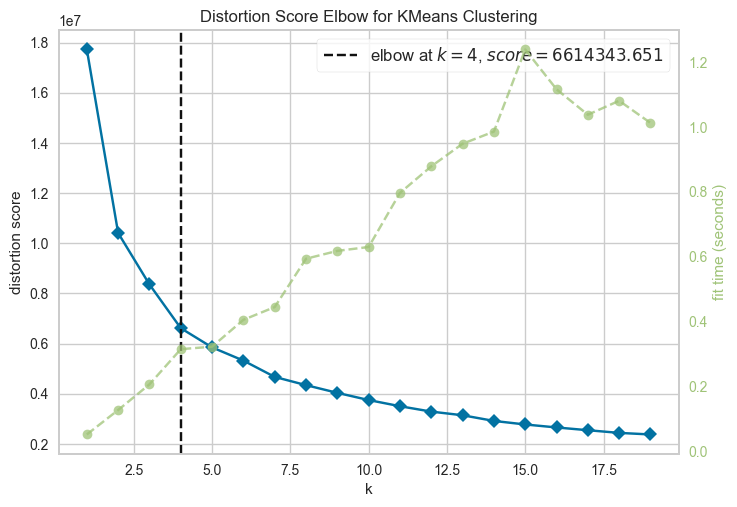

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
visualizer.fit(df_X)
visualizer.poof()

Let's assume that best k = 4

In [53]:
kmeans = KMeans(n_clusters=4)
k_fit = kmeans.fit(df_X)
clusters = k_fit.labels_
clusters

array([0, 2, 0, ..., 2, 2, 2])

In [54]:
df_y = pd.DataFrame({'Clusters': clusters})
df_unsupervised = pd.concat([df_X, df_y], axis=1)
df_unsupervised.iloc[:,-1].value_counts()

3    13152
0    12611
2    12480
1     9928
Name: Clusters, dtype: int64

### K-Means Model&Visualization

In [55]:
kmeans = KMeans(n_clusters=2)
k_fit = kmeans.fit(df_X)

In [56]:
k_fit.cluster_centers_

array([[19.6962762 , 10.92483354, 57.45020962, 11.18377312,  0.3988656 ,
        30.08177559,  0.        ],
       [13.50845999, 10.32692859, 81.53595498,  9.1222756 ,  0.51831804,
        30.20977918,  0.        ]])

In [57]:
k_fit.labels_

array([1, 1, 1, ..., 1, 1, 1])

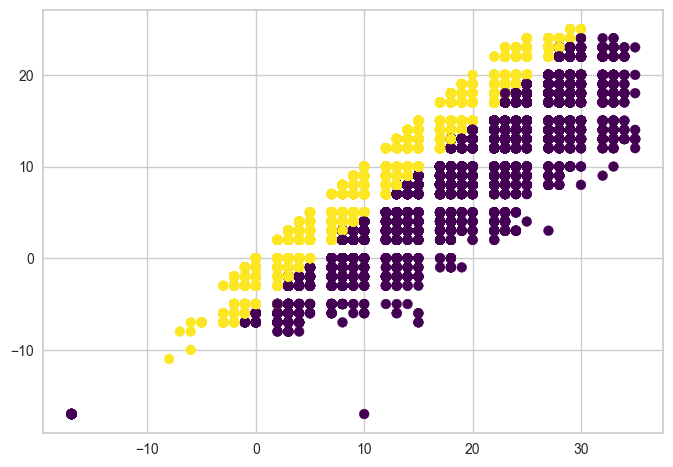

In [58]:
labels = k_fit.labels_
plt.scatter(df.iloc[:,0], df.iloc[:,1],c = labels, s = 50, cmap = 'viridis')

### Clustering Weather due to K-Means (k=4) 

In [62]:
df_org = pd.read_csv('weather_data.csv')
df_org

df_with_clusters = pd.concat([df_org, df_unsupervised.loc[:,'Clusters']], axis=1)
df_with_clusters.tail(3)

,Temperature(°C),Dew Point(°F),Humidity(°%),Wind Speed(°mph),Wind Gust(°mph),Pressure(°in),Precip.,Condition,Clusters
48168,9,4,71,10,0,31,0.0,Fair,2
48169,9,4,71,12,0,31,0.0,Fair,2
48170,9,4,71,13,0,31,0.0,Fair,2


In [ ]:
df_with_clusters.to_csv('weather_data_unsupervise.csv', index= False)